Here we import all the necessary libraries import our data as a dataframe using pandas. After printing out the first 5 rows of our datafram using the head() method we see we need to make atleast one big change. Numbers with a comma as the decimal holder need to be replace with a period.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file = 'countries.csv'
df = pd.read_csv(file)

df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


Next we will see how many entries are in the dataset using the shape attribute. This shows we have 227 countries in our dataframe.

In [2]:
df.shape[0]

227

To continue to better understand our data we use the info() method to see what datatype each column is stored as. We see many of the columns are stored as strings (or non-null objects). We can convert quite a few of these to floats or integers to make the data easier to work with. Just a quick glance shows 'Arable (%)', 'Crops(%)', and 'Other(%)' should be changed but there could be more.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country                               227 non-null object
Region                                227 non-null object
Population                            227 non-null int64
Area (sq. mi.)                        227 non-null int64
Pop. Density (per sq. mi.)            227 non-null object
Coastline (coast/area ratio)          227 non-null object
Net migration                         224 non-null object
Infant mortality (per 1000 births)    224 non-null object
GDP ($ per capita)                    226 non-null float64
Literacy (%)                          209 non-null object
Phones (per 1000)                     223 non-null object
Arable (%)                            225 non-null object
Crops (%)                             225 non-null object
Other (%)                             225 non-null object
Climate                               205 non-null object
Birthrate                 

The first step to all the numeric entries that have commas as the decimal hold to dots. In the process we will convert these numbers to floats if they are not already in that format. I isolate all the columns that need to be converted, replace the commas, and convert the datatype to float. Now we have the data in the form we need it more or less. Some columns have null values but they are few enough to not concern us.


In [4]:
df.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [5]:
cols_to_conv= [
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
        'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service']

df[cols_to_conv]= (df[cols_to_conv].replace(',', '.', regex=True).astype(float))
df['Region'] = df['Region'].str.strip()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country                               227 non-null object
Region                                227 non-null object
Population                            227 non-null int64
Area (sq. mi.)                        227 non-null int64
Pop. Density (per sq. mi.)            227 non-null float64
Coastline (coast/area ratio)          227 non-null float64
Net migration                         224 non-null float64
Infant mortality (per 1000 births)    224 non-null float64
GDP ($ per capita)                    226 non-null float64
Literacy (%)                          209 non-null float64
Phones (per 1000)                     223 non-null float64
Arable (%)                            225 non-null float64
Crops (%)                             225 non-null float64
Other (%)                             225 non-null float64
Climate                               205 non-null object
Birthrate        

Now to rename some columns so the information they show is clearer.

In [6]:
df=df.rename(columns={'Agriculture':'Agriculture (%)','Industry':'Industry (%)', 'Service':'Service (%)'})
df.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture (%)', 'Industry (%)', 'Service (%)'],
      dtype='object')

Now we will look at some data. Let first look at the population. Here we have created a dataframe showing the top 10 most populated countries in the world

In [7]:
pop = df[['Country','Population']]
pop_top_ten = pop.sort_values(by=['Population'], ascending=False).head(10)
pop_top_ten

,Country,Population
42,China,1313973713
94,India,1095351995
214,United States,298444215
95,Indonesia,245452739
27,Brazil,188078227
156,Pakistan,165803560
16,Bangladesh,147365352
169,Russia,142893540
152,Nigeria,131859731
103,Japan,127463611


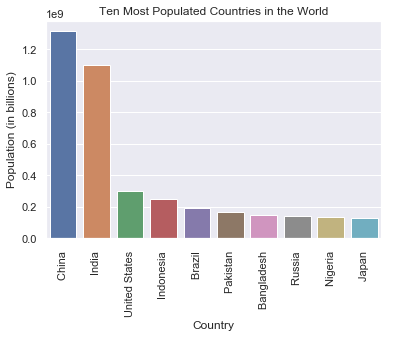

In [8]:
sns.set()
sns.barplot(pop_top_ten['Country'], pop_top_ten['Population'])
plt.xticks(rotation=90)
plt.ylabel('Population (in billions)')
plt.title('Ten Most Populated Countries in the World')
plt.show()

From this visualization we can see China and India are by far the most populated countries in the world and stand out relative to the other top eight. Let's compare China to the world average. The visualization shows the huge difference between China and world average

In [9]:
df['Country'] = df['Country'].str.strip()
china = df.loc[df['Country']== 'China']
world_mean= round(df['Population'].mean())
china_pop = china['Population'].values
print('Average Country Population: {:,}\nChina Population: {:,}'.format(int(world_mean), china_pop[0]))






Average Country Population: 28,740,284
China Population: 1,313,973,713


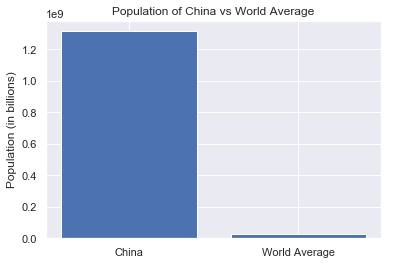

In [10]:
data = {u'China':china_pop[0], u'World Average':world_mean}
plt.bar(*zip(*data.items()))
plt.ylabel('Population (in billions)')
plt.title('Population of China vs World Average')
plt.show()

Now we can look at the GDP figures for the top and bottom 10 countries

In [11]:
gdp = df[['Country', 'GDP ($ per capita)']]
gdp_top_ten = gdp.sort_values(by=['GDP ($ per capita)'], ascending=False).head(10)
gdp_top_ten

,Country,GDP ($ per capita)
121,Luxembourg,55100.0
154,Norway,37800.0
214,United States,37800.0
22,Bermuda,36000.0
38,Cayman Islands,35000.0
177,San Marino,34600.0
196,Switzerland,32700.0
54,Denmark,31100.0
93,Iceland,30900.0
12,Austria,30000.0


In [12]:
gdp_bottom_ten = gdp.sort_values(by=['GDP ($ per capita)'], ascending=True).head(10)
gdp_bottom_ten

,Country,GDP ($ per capita)
58,East Timor,500.0
188,Somalia,500.0
183,Sierra Leone,500.0
33,Burundi,600.0
200,Tanzania,600.0
74,Gaza Strip,600.0
125,Malawi,600.0
0,Afghanistan,700.0
46,"Congo, Repub. of the",700.0
63,Eritrea,700.0


From this data it looks like if we went by region, Europe would have the highest average and Africa would have the lowest. Let's group this data by region to find out.

In [13]:
gdp_region = df[['Region','GDP ($ per capita)']]
gdp_by_region = gdp_region.groupby('Region').agg(np.mean).sort_values(by=['GDP ($ per capita)'], ascending=False)
gdp_by_region

,GDP ($ per capita)
Region,
WESTERN EUROPE,27046.428571
NORTHERN AMERICA,26100.000000
BALTICS,11300.000000
NEAR EAST,10456.250000
EASTERN EUROPE,9808.333333
LATIN AMER. & CARIB,8682.222222
OCEANIA,8247.619048
ASIA (EX. NEAR EAST),8053.571429
NORTHERN AFRICA,5460.000000


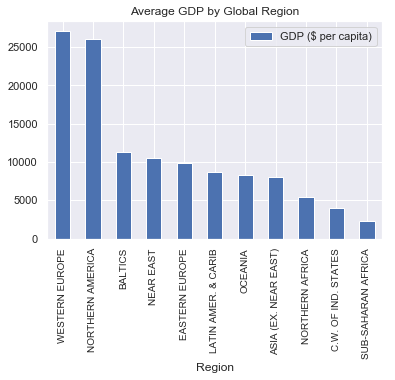

In [14]:
gdp_by_region.plot(kind='bar', align= 'center')
plt.xticks(fontsize= 'small')
plt.ylabel('')
plt.title('Average GDP by Global Region')

plt.show()

After visualizing our data we can see we were correct. Europe, specifically Western Europe, and North America have the the highest average GDP while Africa has the lowest average.